In [83]:
#Importing all libraries
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import matplotlib.dates as matDates

In [84]:
#Reading COVID-19 Dataset for confirmed and death cases
dataFrame_confirm_cases = pd.read_csv ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dataFrame_death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [85]:
#Displaying confirmed cases dataset
dataFrame_confirm_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205541,205612,205612,205802,205830,205907,206073,206133,206145,206206
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333316,333322,333330,333330,333338,333343,333360,333381,333391,333408
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271057,271061,271061,271079,271082,271090,271096,271100,271102,271107
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,47219,47219,47219,47219,47219
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104676,104676,104676,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333721,333746,333746,333746,333746,333746,333746


In [86]:
#Displaying Death cases dataset
dataFrame_death_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7834,7834,7834,7834
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,157,157,157,157,157
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1924,1924,1924,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


In [87]:
#Creating new column with total count of confirmed cases as Total_Confirmed_Cases
dataFrame_confirm_cases['Total_Confirmed_Cases'] = dataFrame_confirm_cases.iloc[:,4:].sum(axis=1)
dataFrame_confirm_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,Total_Confirmed_Cases
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,110214917
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,153830108
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,156966802
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,20010202
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,50040541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,345738380
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,163637
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,6744660
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333746,333746,333746,333746,333746,333746,163803740


In [88]:
#Creating new column with total count of Death cases as Total_Death_Cases
dataFrame_death_cases['Total_Death_Cases'] = dataFrame_death_cases.iloc[:,4:].sum(axis=1)
dataFrame_death_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,Total_Death_Cases
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,4673864
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,2143775
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,4247580
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,111622
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1048488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,3212449
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,1310341
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,2248142


In [89]:
#Creating new dataset with province/state, country/region, total cases so that we can merge them
confirmed_cases = dataFrame_confirm_cases[['Province/State','Country/Region','Total_Confirmed_Cases']]
death_cases = dataFrame_death_cases[['Province/State','Country/Region','Total_Death_Cases']]

In [90]:
#Merging both confirmed cases and death cases to create single dataFrame for Global Level data
dataFrame_global_level = pd.merge(confirmed_cases, death_cases, on=['Province/State','Country/Region'])
dataFrame_global_level

,Province/State,Country/Region,Total_Confirmed_Cases,Total_Death_Cases
0,NaN,Afghanistan,110214917,4673864
1,NaN,Albania,153830108,2143775
2,NaN,Algeria,156966802,4247580
3,NaN,Andorra,20010202,111622
4,NaN,Angola,50040541,1048488
...,...,...,...,...
284,NaN,West Bank and Gaza,345738380,3212449
285,NaN,Winter Olympics 2022,163637,0
286,NaN,Yemen,6744660,1310341
287,NaN,Zambia,163803740,2248142


In [91]:
#Using Access Key to get timeseries data of american, canadian, travel, real estate, precious metals.
acc_key = 'KSQ4GTM6O2NT2G7T'
ts = TimeSeries(key=acc_key,output_format='pandas')
a_american = ts.get_daily_adjusted('NASDX') #National Association of Securities Dealers Automated Quotations Stock Exchange
b_canadian = ts.get_daily_adjusted('TSE') #Torronto Stock Exchange
c_travel = ts.get_daily_adjusted('LUV') #SouthWest Airlines
d_real_estate = ts.get_daily_adjusted('AMT') #American Tower Real Estate
e_precious_metals = ts.get_daily_adjusted('GOLD') #Gold Metal

In [92]:
#Reseting index of american stock exchange dataFrame.
dataFrame_american = pd.DataFrame(a_american[0]).reset_index(level=0)
dataFrame_american

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-01,26.01,26.01,26.01,26.01,26.010000,0.0,0.0000,1.0
1,2022-11-30,25.97,25.97,25.97,25.97,25.970000,0.0,0.7655,1.0
2,2022-11-29,25.57,25.57,25.57,25.57,24.837906,0.0,0.0000,1.0
3,2022-11-28,25.75,25.75,25.75,25.75,25.012753,0.0,0.0000,1.0
4,2022-11-25,26.13,26.13,26.13,26.13,25.381873,0.0,0.0000,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-19,27.20,27.20,27.20,27.20,26.388848,0.0,0.0000,1.0
96,2022-07-18,26.38,26.38,26.38,26.38,25.593301,0.0,0.0000,1.0
97,2022-07-15,26.62,26.62,26.62,26.62,25.826144,0.0,0.0000,1.0
98,2022-07-14,26.14,26.14,26.14,26.14,25.360459,0.0,0.0000,1.0


In [93]:
#Reseting index of canadian stock exchange dataFrame.
dataFrame_canadian = pd.DataFrame(b_canadian[0]).reset_index(level=0)
dataFrame_canadian

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,24.08,24.350,23.630,23.75,23.750000,250225.0,0.0,1.0
1,2022-12-02,24.20,24.845,24.100,24.24,24.240000,319719.0,0.0,1.0
2,2022-12-01,24.61,25.440,24.520,24.67,24.670000,410078.0,0.0,1.0
3,2022-11-30,24.09,24.700,23.390,24.65,24.650000,449444.0,0.0,1.0
4,2022-11-29,23.84,24.390,23.605,24.31,24.310000,262948.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-21,41.96,43.160,41.740,43.03,42.321323,366069.0,0.0,1.0
96,2022-07-20,42.96,43.760,42.680,43.05,42.340993,402421.0,0.0,1.0
97,2022-07-19,42.29,43.990,41.909,43.01,42.301652,362366.0,0.0,1.0
98,2022-07-18,41.57,42.990,41.270,41.60,40.914874,406968.0,0.0,1.0


In [94]:
#Reseting index of travel dataFrame.
dataFrame_travel = pd.DataFrame(c_travel[0]).reset_index(level=0)
dataFrame_travel

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,39.52,40.380,39.1500,39.50,39.50,5160187.0,0.0,1.0
1,2022-12-02,39.64,39.910,39.4100,39.75,39.75,5312603.0,0.0,1.0
2,2022-12-01,40.00,40.200,39.7100,40.08,40.08,5185195.0,0.0,1.0
3,2022-11-30,39.28,39.935,38.8150,39.91,39.91,4794101.0,0.0,1.0
4,2022-11-29,38.63,39.380,38.6300,39.25,39.25,4628793.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-21,40.59,40.920,40.1000,40.89,40.89,7632670.0,0.0,1.0
96,2022-07-20,41.44,41.760,40.8300,41.50,41.50,5161971.0,0.0,1.0
97,2022-07-19,40.52,41.640,40.5200,41.49,41.49,5068915.0,0.0,1.0
98,2022-07-18,40.15,40.915,39.7528,39.95,39.95,5433828.0,0.0,1.0


In [95]:
#Reseting index of american stock exchange dataFrame.
dataFrame_real_estate = pd.DataFrame(d_real_estate[0]).reset_index(level=0)
dataFrame_real_estate

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,215.95,218.4900,214.58,215.61,215.610000,1446502.0,0.0,1.0
1,2022-12-02,218.27,220.9100,216.27,219.37,219.370000,1354622.0,0.0,1.0
2,2022-12-01,224.42,225.9650,219.89,221.30,221.300000,1708694.0,0.0,1.0
3,2022-11-30,215.88,221.3400,214.67,221.25,221.250000,3889213.0,0.0,1.0
4,2022-11-29,214.81,217.2700,213.32,217.22,217.220000,1848103.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-21,250.17,255.9899,248.19,255.40,253.485477,1290350.0,0.0,1.0
96,2022-07-20,256.00,257.9300,249.43,249.74,247.867905,1573621.0,0.0,1.0
97,2022-07-19,251.61,257.2700,251.50,257.16,255.232284,1506361.0,0.0,1.0
98,2022-07-18,256.91,257.7900,248.58,249.25,247.381578,1608197.0,0.0,1.0


In [96]:
#Reseting index of american stock exchange dataFrame.
dataFrame_precious_metals = pd.DataFrame(e_precious_metals[0]).reset_index(level=0)
dataFrame_precious_metals

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,16.81,16.910,16.47,16.52,16.520000,20954110.0,0.00,1.0
1,2022-12-02,16.78,17.140,16.58,16.98,16.980000,18763740.0,0.00,1.0
2,2022-12-01,16.75,17.340,16.67,17.09,17.090000,31207840.0,0.00,1.0
3,2022-11-30,16.03,16.440,15.87,16.32,16.320000,25458234.0,0.00,1.0
4,2022-11-29,15.59,15.960,15.54,15.87,15.870000,15770773.0,0.05,1.0
...,...,...,...,...,...,...,...,...,...
95,2022-07-21,15.52,15.760,15.38,15.50,15.348925,29498719.0,0.00,1.0
96,2022-07-20,15.99,16.045,15.43,15.45,15.299412,22001419.0,0.00,1.0
97,2022-07-19,15.83,16.080,15.71,16.03,15.873759,19009917.0,0.00,1.0
98,2022-07-18,15.96,16.086,15.82,15.82,15.665806,19249811.0,0.00,1.0


In [97]:
#Renaming and accessing only date, daily high and low data of american market
dataFrame_american = dataFrame_american[['date','2. high','3. low']].rename(columns={"2. high":"american_high","3. low":"american_low"})
dataFrame_american

,date,american_high,american_low
0,2022-12-01,26.01,26.01
1,2022-11-30,25.97,25.97
2,2022-11-29,25.57,25.57
3,2022-11-28,25.75,25.75
4,2022-11-25,26.13,26.13
...,...,...,...
95,2022-07-19,27.20,27.20
96,2022-07-18,26.38,26.38
97,2022-07-15,26.62,26.62
98,2022-07-14,26.14,26.14


In [98]:
#Renaming and accessing only date, daily high and low data of canadian market
dataFrame_canadian = dataFrame_canadian[['date','2. high','3. low']].rename(columns={"2. high":"canadian_high","3. low":"canadian_low"})
dataFrame_canadian

,date,canadian_high,canadian_low
0,2022-12-05,24.350,23.630
1,2022-12-02,24.845,24.100
2,2022-12-01,25.440,24.520
3,2022-11-30,24.700,23.390
4,2022-11-29,24.390,23.605
...,...,...,...
95,2022-07-21,43.160,41.740
96,2022-07-20,43.760,42.680
97,2022-07-19,43.990,41.909
98,2022-07-18,42.990,41.270


In [99]:
#Renaming and accessing only date, daily high and low data of Travel market
dataFrame_travel = dataFrame_travel[['date','2. high','3. low']].rename(columns={"2. high":"travel_high","3. low":"travel_low"})
dataFrame_travel

,date,travel_high,travel_low
0,2022-12-05,40.380,39.1500
1,2022-12-02,39.910,39.4100
2,2022-12-01,40.200,39.7100
3,2022-11-30,39.935,38.8150
4,2022-11-29,39.380,38.6300
...,...,...,...
95,2022-07-21,40.920,40.1000
96,2022-07-20,41.760,40.8300
97,2022-07-19,41.640,40.5200
98,2022-07-18,40.915,39.7528


In [100]:
#Renaming and accessing only date, daily high and low data of Real Estate market
dataFrame_real_estate = dataFrame_real_estate[['date','2. high','3. low']].rename(columns={"2. high":"real_estate_high","3. low":"real_estate_low"})
dataFrame_real_estate

,date,real_estate_high,real_estate_low
0,2022-12-05,218.4900,214.58
1,2022-12-02,220.9100,216.27
2,2022-12-01,225.9650,219.89
3,2022-11-30,221.3400,214.67
4,2022-11-29,217.2700,213.32
...,...,...,...
95,2022-07-21,255.9899,248.19
96,2022-07-20,257.9300,249.43
97,2022-07-19,257.2700,251.50
98,2022-07-18,257.7900,248.58


In [101]:
#Renaming and accessing only date, daily high and low data of Precious Metal Market
dataFrame_precious_metals = dataFrame_precious_metals[['date','2. high','3. low']].rename(columns={"2. high":"metal_high","3. low":"metal_low"})
dataFrame_precious_metals

,date,metal_high,metal_low
0,2022-12-05,16.910,16.47
1,2022-12-02,17.140,16.58
2,2022-12-01,17.340,16.67
3,2022-11-30,16.440,15.87
4,2022-11-29,15.960,15.54
...,...,...,...
95,2022-07-21,15.760,15.38
96,2022-07-20,16.045,15.43
97,2022-07-19,16.080,15.71
98,2022-07-18,16.086,15.82


In [102]:
#Merging all stocks dataFrame
dataFrame_stocks = dataFrame_american.merge(dataFrame_canadian, on="date").merge(dataFrame_precious_metals, on="date").merge(dataFrame_real_estate,on="date").merge(dataFrame_travel,on="date")
dataFrame_stocks

,date,american_high,american_low,canadian_high,canadian_low,metal_high,metal_low,real_estate_high,real_estate_low,travel_high,travel_low
0,2022-12-01,26.01,26.01,25.44,24.520,17.340,16.670,225.9650,219.89,40.200,39.7100
1,2022-11-30,25.97,25.97,24.70,23.390,16.440,15.870,221.3400,214.67,39.935,38.8150
2,2022-11-29,25.57,25.57,24.39,23.605,15.960,15.540,217.2700,213.32,39.380,38.6300
3,2022-11-28,25.75,25.75,24.14,23.230,16.090,15.500,220.3700,213.04,39.140,38.4650
4,2022-11-25,26.13,26.13,25.12,24.550,16.270,16.015,221.2400,218.38,39.575,38.5650
...,...,...,...,...,...,...,...,...,...,...,...
93,2022-07-21,28.02,28.02,43.16,41.740,15.760,15.380,255.9899,248.19,40.920,40.1000
94,2022-07-20,27.63,27.63,43.76,42.680,16.045,15.430,257.9300,249.43,41.760,40.8300
95,2022-07-19,27.20,27.20,43.99,41.909,16.080,15.710,257.2700,251.50,41.640,40.5200
96,2022-07-18,26.38,26.38,42.99,41.270,16.086,15.820,257.7900,248.58,40.915,39.7528


In [103]:
#Grouping Canda Death Cases and Resetting Index
dataFrame_Canada_Death_Cases = dataFrame_death_cases[dataFrame_death_cases['Country/Region'] == "Canada"].groupby("Country/Region").sum().reset_index()
dataFrame_Canada_Death_Cases

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,Total_Death_Cases
0,Canada,708.8556,-1202.5979,0,0,0,0,0,0,0,...,47862,47862,47923,47923,48002,48133,48133,48133,48133,25501950


In [104]:
#Grouping US Death Cases and Resetting Index
dataFrame_US_Death_Cases =dataFrame_death_cases[dataFrame_death_cases['Country/Region'] == "US"].groupby("Country/Region").sum().reset_index()
dataFrame_US_Death_Cases

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,Total_Death_Cases
0,US,40.0,-100.0,0,0,0,0,0,0,0,...,1079296,1079296,1079576,1079969,1080536,1081147,1081412,1081431,1081431,609118411


In [105]:
#Grouping Canada Confirmed Cases and Resetting Index
dataFrame_Canada_Confirmed_Cases = dataFrame_confirm_cases[dataFrame_confirm_cases['Country/Region'] == "Canada"].groupby("Country/Region").sum().reset_index()
dataFrame_Canada_Confirmed_Cases

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,Total_Confirmed_Cases
0,Canada,708.8556,-1202.5979,0,2,3,3,3,3,4,...,4428546,4428546,4430558,4431111,4432426,4444843,4444912,4444912,4444912,1830102039


In [106]:
#Grouping US Confirmed Cases and Resetting Index
dataFrame_US_Confirmed_Cases =dataFrame_confirm_cases[dataFrame_confirm_cases['Country/Region'] == "US"].groupby("Country/Region").sum().reset_index()
dataFrame_US_Confirmed_Cases

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,Total_Confirmed_Cases
0,US,40.0,-100.0,1,1,2,2,5,5,5,...,98569058,98573468,98633140,98697622,98807782,98924207,98962019,98967906,98972375,44149110712


In [107]:
#Dropping unused columns Lat and Long and then transposing the table and resetting index.
dataFrame_canadaDeathCase = dataFrame_Canada_Death_Cases.drop(columns=["Lat","Long"]).transpose().reset_index()

#Renaming the column
dataFrame_canadaDeathCase.columns = ["date","Canada_Death_Cases"]

#Taking only dates and its value
dataFrame_canadaDeathCase = dataFrame_canadaDeathCase.iloc[1:-1]

dataFrame_canadaDeathCase

,date,Canada_Death_Cases
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
5,1/26/20,0
...,...,...
1044,11/30/22,48002
1045,12/1/22,48133
1046,12/2/22,48133
1047,12/3/22,48133


In [108]:
#Dropping unused columns Lat and Long and then transposing the table and resetting index.
dataFrame_USDeathCase = dataFrame_US_Death_Cases.drop(columns=["Lat","Long"]).transpose().reset_index()

#Renaming the column
dataFrame_USDeathCase.columns = ["date","US_Death_Cases"]

#Taking only dates and its value
dataFrame_USDeathCase = dataFrame_USDeathCase.iloc[1:-1]

dataFrame_USDeathCase

,date,US_Death_Cases
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
5,1/26/20,0
...,...,...
1044,11/30/22,1080536
1045,12/1/22,1081147
1046,12/2/22,1081412
1047,12/3/22,1081431


In [109]:
#Dropping unused columns Lat and Long and then transposing the table and resetting index
dataFrame_canadaConfirmedCase = dataFrame_Canada_Confirmed_Cases.drop(columns=["Lat","Long"]).transpose().reset_index()

#Renaming the column
dataFrame_canadaConfirmedCase.columns = ["date","Canada_Confirmed_Cases"]

#Taking only dates and its value
dataFrame_canadaConfirmedCase = dataFrame_canadaConfirmedCase.iloc[1:-1]

dataFrame_canadaConfirmedCase

,date,Canada_Confirmed_Cases
1,1/22/20,0
2,1/23/20,2
3,1/24/20,3
4,1/25/20,3
5,1/26/20,3
...,...,...
1044,11/30/22,4432426
1045,12/1/22,4444843
1046,12/2/22,4444912
1047,12/3/22,4444912


In [110]:
#Dropping unused columns Lat and Long and then transposing the table and resetting index.
dataFrame_USConfirmedCase = dataFrame_US_Confirmed_Cases.drop(columns=["Lat","Long"]).transpose().reset_index()

#Renaming the column
dataFrame_USConfirmedCase.columns = ["date","US_Confirmed_Cases"]

#Taking only dates and its value
dataFrame_USConfirmedCase = dataFrame_USConfirmedCase.iloc[1:-1]

dataFrame_USConfirmedCase

,date,US_Confirmed_Cases
1,1/22/20,1
2,1/23/20,1
3,1/24/20,2
4,1/25/20,2
5,1/26/20,5
...,...,...
1044,11/30/22,98807782
1045,12/1/22,98924207
1046,12/2/22,98962019
1047,12/3/22,98967906


In [111]:
#Merging both Canada and US Death Case 
dataFrame_Total_death = dataFrame_canadaDeathCase.merge(dataFrame_USDeathCase, on="date")

#Merging both Canada and US Confirmed Case
dataFrame_Total_confirm = dataFrame_canadaConfirmedCase.merge(dataFrame_USConfirmedCase, on="date")

#Merging both Canada and US Confirmed and Death Case
dataFrame_Merged_Death_Confirmed = dataFrame_Total_death.merge(dataFrame_Total_confirm, on = "date")
dataFrame_Merged_Death_Confirmed

,date,Canada_Death_Cases,US_Death_Cases,Canada_Confirmed_Cases,US_Confirmed_Cases
0,1/22/20,0,0,0,1
1,1/23/20,0,0,2,1
2,1/24/20,0,0,3,2
3,1/25/20,0,0,3,2
4,1/26/20,0,0,3,5
...,...,...,...,...,...
1043,11/30/22,48002,1080536,4432426,98807782
1044,12/1/22,48133,1081147,4444843,98924207
1045,12/2/22,48133,1081412,4444912,98962019
1046,12/3/22,48133,1081431,4444912,98967906


In [112]:
#Converting Date of dataFrame_Merged_Death_Confirmed to proper datetime
dataFrame_Merged_Death_Confirmed['date'] = pd.to_datetime(dataFrame_Merged_Death_Confirmed['date'])

#Merging both COVID-19 and Stock dataFrames
dataFrame_Merged_COVID_Stock = dataFrame_Merged_Death_Confirmed.merge(dataFrame_stocks, on='date',how='left')

#Displaying final dataFrame with both COVID-19 and Stock data
dataFrame_Merged_COVID_Stock

,date,Canada_Death_Cases,US_Death_Cases,Canada_Confirmed_Cases,US_Confirmed_Cases,american_high,american_low,canadian_high,canadian_low,metal_high,metal_low,real_estate_high,real_estate_low,travel_high,travel_low
0,2020-01-22,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,0,0,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,0,0,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,0,0,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2022-11-30,48002,1080536,4432426,98807782,25.97,25.97,24.70,23.39,16.44,15.87,221.340,214.67,39.935,38.815
1044,2022-12-01,48133,1081147,4444843,98924207,26.01,26.01,25.44,24.52,17.34,16.67,225.965,219.89,40.200,39.710
1045,2022-12-02,48133,1081412,4444912,98962019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1046,2022-12-03,48133,1081431,4444912,98967906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


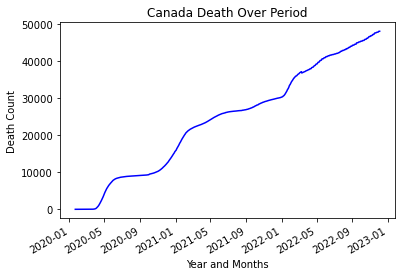

In [113]:
#Graph showing Canada Death Cases Over the period 
fig = plt.figure()

plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['Canada_Death_Cases'],'b-')

plt.title("Canada Death Over Period")
plt.xlabel("Year and Months")
plt.ylabel("Death Count")

fig.autofmt_xdate()
plt.show()

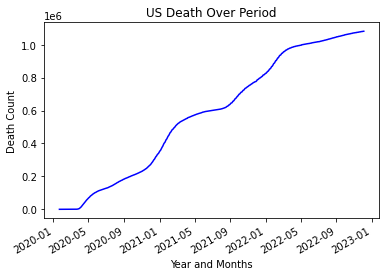

In [114]:
#Graph showing US Death Cases Over the period
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['US_Death_Cases'],'b-')

plt.title("US Death Over Period")
plt.xlabel("Year and Months")
plt.ylabel("Death Count")

fig.autofmt_xdate()
plt.show()

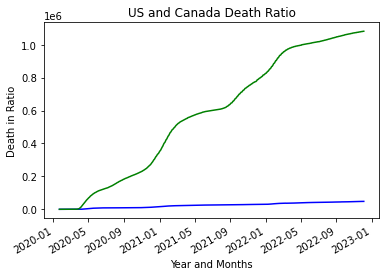

In [115]:
#Graph showing Canada and US Death Cases Over the period
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['Canada_Death_Cases'],'b-')
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['US_Death_Cases'],'g-')

plt.title("US and Canada Death Ratio")
plt.xlabel("Year and Months")
plt.ylabel("Death in Ratio")

fig.autofmt_xdate()
plt.show()

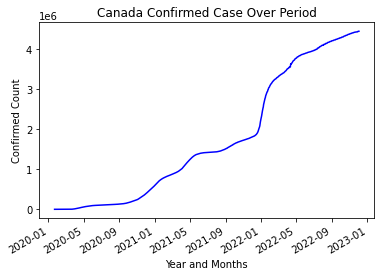

In [116]:
#Graph showing Canada Confirmed Cases Over the period
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['Canada_Confirmed_Cases'],'b-')

plt.title("Canada Confirmed Case Over Period")
plt.xlabel("Year and Months")
plt.ylabel("Confirmed Count")

fig.autofmt_xdate()
plt.show()

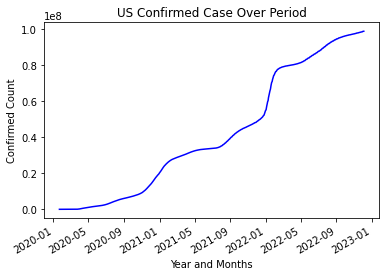

In [117]:
#Graph showing US Confirmed Cases Over the period
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['US_Confirmed_Cases'],'b-')

plt.title("US Confirmed Case Over Period")
plt.xlabel("Year and Months")
plt.ylabel("Confirmed Count")

fig.autofmt_xdate()
plt.show()

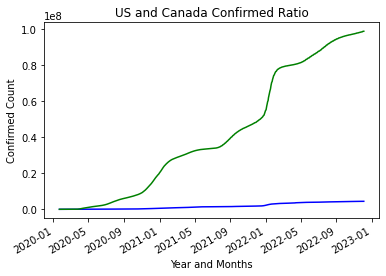

In [118]:
#Graph showing Canada and US Confirmed Cases Over the period
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['Canada_Confirmed_Cases'],'b-')
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['US_Confirmed_Cases'],'g-')

plt.title("US and Canada Confirmed Ratio")
plt.xlabel("Year and Months")
plt.ylabel("Confirmed Count")

fig.autofmt_xdate()
plt.show()

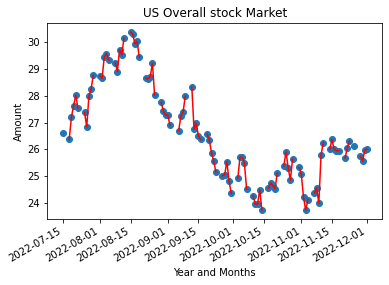

In [120]:
#Overall US Stock Market
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['american_low'])
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['american_high'],'r-')

plt.title("US Overall stock Market")
plt.xlabel("Year and Months")
plt.ylabel("Amount")

fig.autofmt_xdate()
plt.show()

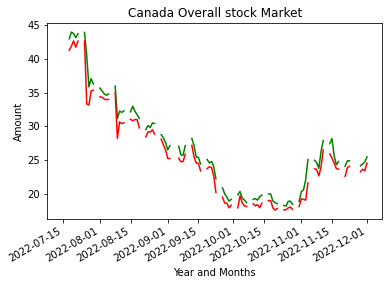

In [123]:
#Overall Canada Stock Market
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['canadian_high'],'g-')
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['canadian_low'],'r-')

plt.title("Canada Overall stock Market")
plt.xlabel("Year and Months")
plt.ylabel("Amount")

fig.autofmt_xdate()
plt.show()

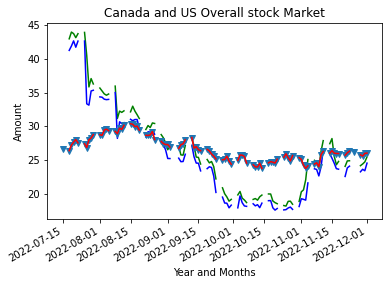

In [127]:
#Overall Canada and US Stock Market
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['canadian_high'],'g-')
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['canadian_low'],'b-')
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['american_low'],'v-')
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['american_high'],'r-')

plt.title("Canada and US Overall stock Market")
plt.xlabel("Year and Months")
plt.ylabel("Amount")

fig.autofmt_xdate()
plt.show()

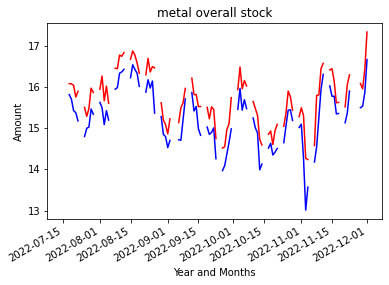

In [137]:
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['metal_low'],'b-')
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['metal_high'],'r-')

plt.title("metal overall stock")
plt.xlabel("Year and Months")
plt.ylabel("Amount")

fig.autofmt_xdate()
plt.show()

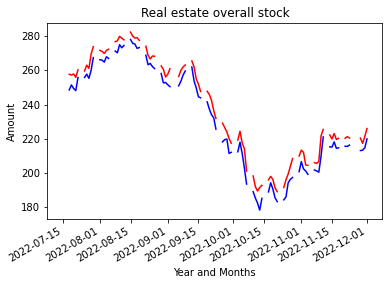

In [134]:
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['real_estate_low'],'b-')
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['real_estate_high'],'r-')

plt.title("Real estate overall stock")
plt.xlabel("Year and Months")
plt.ylabel("Amount")

fig.autofmt_xdate()
plt.show()

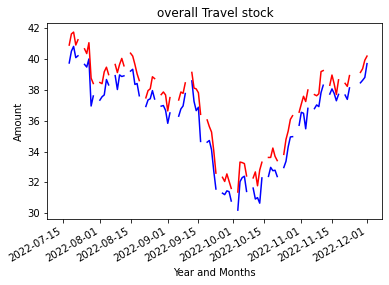

In [136]:
fig = plt.figure()
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['travel_low'],'b-')
plt.plot_date(dataFrame_Merged_COVID_Stock['date'],dataFrame_Merged_COVID_Stock['travel_high'],'r-')

plt.title("overall Travel stock")
plt.xlabel("Year and Months")
plt.ylabel("Amount")

fig.autofmt_xdate()
plt.show()